In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [29]:
# Load the dataset
dataset = pd.read_csv('wine_quality.csv', sep=';')

In [30]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [31]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


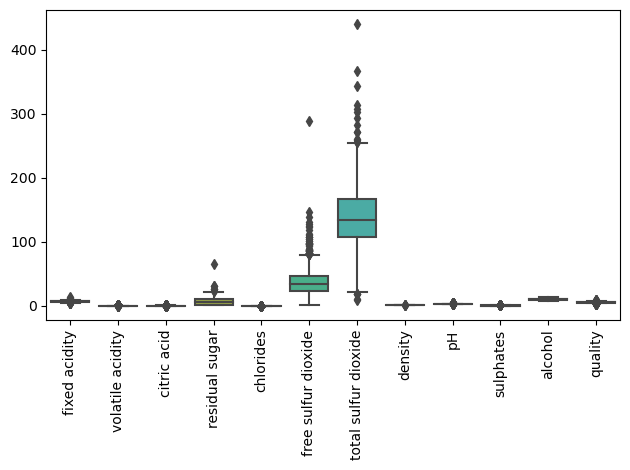

In [32]:
ax = sn.boxplot(data=dataset, orient="v")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Display x-axis labels vertically
plt.tight_layout()  # Ensure labels and ticks are not cut off
plt.show()

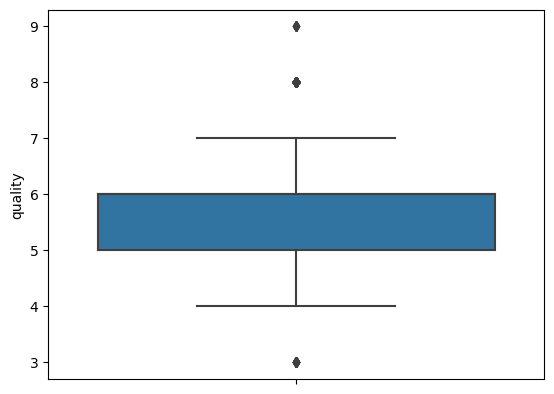

In [33]:
sn.boxplot(data=dataset, y="quality", orient="v")
plt.show()

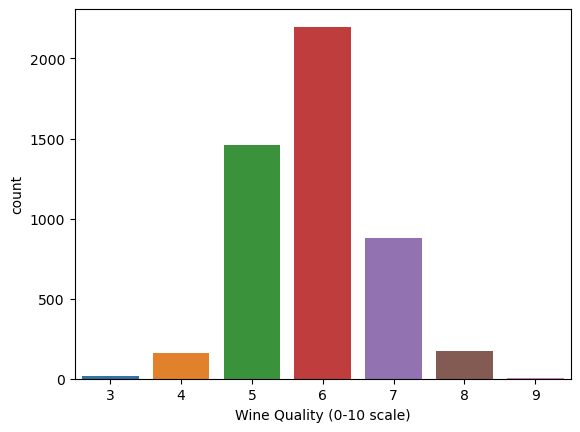

In [34]:
sn.countplot(x="quality", data=dataset)
plt.xlabel("Wine Quality (0-10 scale)")
plt.show()

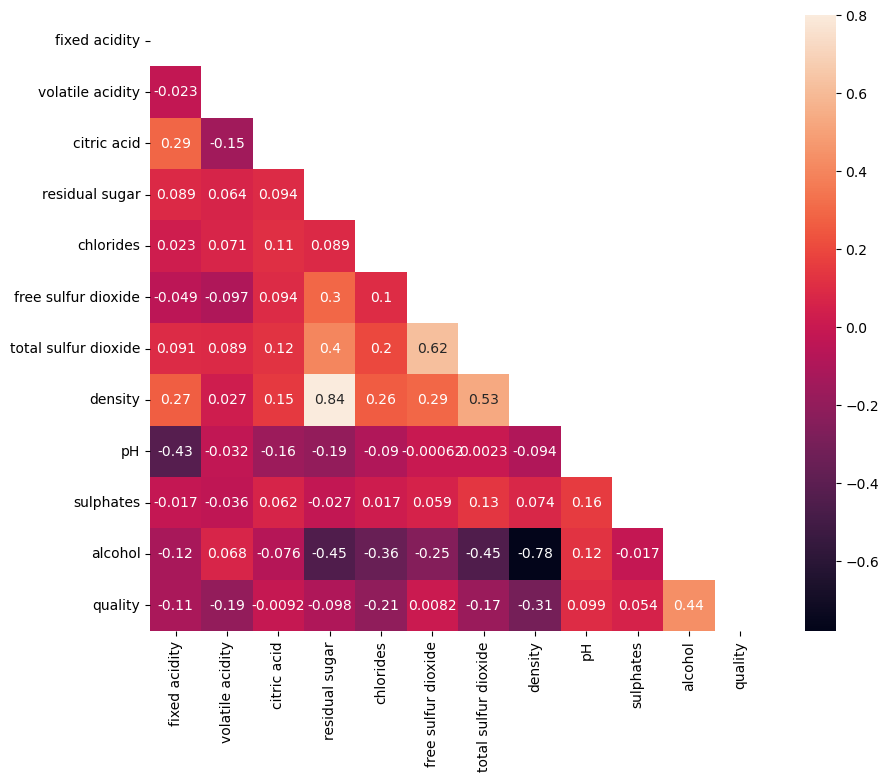

In [35]:
corr_matrix = dataset.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sn.heatmap(corr_matrix, mask=mask, vmax=.8, square=True, annot=True)
plt.show()

In [36]:
# Splitting class label from other features
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the dataset
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

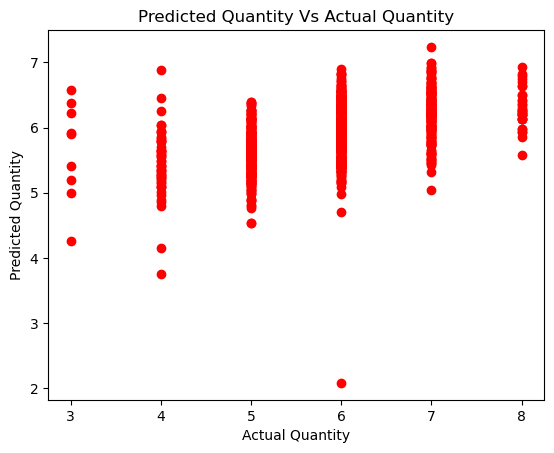

In [37]:
# Prediction
prediction = regressor.predict(X_test)

# Display results
plt.scatter(y_test, prediction, c='r')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Predicted Quantity Vs Actual Quantity')
plt.show()




In [38]:
# Lastly, let's use the trained model to make predictions on new data and visualize the results
new_data = np.array([[0.5, 0.3, 0.6, 0.2, 0.8, 0.1, 0.2, 0.4, 0.5, 0.3, 0.7]])

# Create a new instance of StandardScaler for the new data
scaler_new_data = StandardScaler()
new_data_scaled = scaler_new_data.fit_transform(new_data)

# Make predictions
predicted_quality = regressor.predict(new_data_scaled)

print("Predicted Wine Quality:", predicted_quality[0])


Predicted Wine Quality: 5.892036753446028
